### homework 2, part 1

build a CNN to classify the galaxies you worked with in homework 1

in order to submit you need to achieve a validation set accuracy of 75% or more.

the notebook below explains how to use transfer learning - to load part of a pre-trained vision model and use that to build a new model.

download the dataset (if you don't already have it from HW 1)

In [1]:
!wget https://www.dropbox.com/s/apl6g5g9svhnfyg/Dataset.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!unzip Dataset.zip

In [1]:
path_to_training_data = 'Dataset/train/'
path_to_validation_data = 'Dataset/validation/'

In [2]:
%load_ext autoreload
%autoreload 2

#### you can reuse your dataloader from homework 1, but don't flatten the image - keep it as 69x69,
#### IMPORTANT repeat the single grayscale image 3 times so that you get a 3x69x69 image
the pre-trained model we will use has been trained on color images that have three channel (R,G,B) so we need our input to match that, at least in its shape.


you can add the extra repetitions like this:

In [3]:
import torch
some_tensor = torch.rand(1,69,69)
print(some_tensor.shape)
some_tensor = some_tensor.repeat(3,1,1) ## <--- repeat 
print(some_tensor.shape)

torch.Size([1, 69, 69])
torch.Size([3, 69, 69])


In [4]:
from dataloader import CustomDataset

In [5]:
training_ds = CustomDataset(path_to_training_data,transform=True)
validation_ds = CustomDataset(path_to_validation_data)


some_random_idx = 52
x,y = training_ds[some_random_idx]
print(x,y)
x.shape

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]) tensor(0)


torch.Size([3, 69, 69])

In [6]:
from torch.utils.data import Dataset, DataLoader

training_dataloader = DataLoader(training_ds,batch_size=300,shuffle=True)
valid_dataloader = DataLoader(validation_ds,batch_size=300)

In [7]:
#make sure that you are getting the right dimensions - (Batch size, 3, 69,69)

for x,y in training_dataloader:
    print(x.shape,y.shape)
    break

torch.Size([300, 3, 69, 69]) torch.Size([300])


### download the pre-trained model

chose from the list of models here
https://pytorch.org/vision/stable/models.html

In [8]:
import torchvision.models as models


pretrained_model = models.vgg11(pretrained=True)

### you can look at the internals of the models and pick which parts you want.

In [9]:
pretrained_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [10]:
#the pretrained models have an output shape that matches the number of classes they were trained on
pretrained_model(x).shape

torch.Size([300, 1000])

##### pass the 69x69x3 image through the part of the model we want to use, look at the output size, build the classifier to take this size as input

In [11]:
pretrained_model.features(x).shape

torch.Size([300, 512, 2, 2])

### build your model

In [18]:
from model import Net

In [19]:
net = Net()

In [21]:
net(x).shape

torch.Size([300, 10])

### how to use the pre-trained model weights?

we need to modify the state_dict of the model.
this is dictionary that maps between a layer name to the actual weights

In [22]:
for key in net.state_dict().keys():
    print(key)

features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.11.weight
features.11.bias
features.13.weight
features.13.bias
features.16.weight
features.16.bias
features.18.weight
features.18.bias
classifier.0.weight
classifier.0.bias
classifier.3.weight
classifier.3.bias
classifier.6.weight
classifier.6.bias


### copy the parts of the pre-trained model to your models state dict, and use load_state_dict to actually update the model. now you are ready to train

In [23]:
pretrained_dict = pretrained_model.state_dict()
state_dict = net.state_dict()

for key in state_dict.keys():
    if 'features' not in key:
        continue
    if key in pretrained_dict.keys():
        state_dict[key] = pretrained_dict[key]

net.load_state_dict(state_dict)

<All keys matched successfully>

### the rest of the code is the same as homework 1

you can submit the homework when you achieve validation accuracy above 75%

In [24]:
import torch.nn as nn
import torch.optim as optim


loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) 

In [25]:
def compute_accuracy_and_loss(dataloader,net):
    total = 0
    correct = 0
    
    loss = 0
    
    if torch.cuda.is_available():
        net.cuda()
    net.eval()
    
    n_batches = 0
    with torch.no_grad():
        for x,y in dataloader:
            n_batches+=1
            
            if torch.cuda.is_available():
                x = x.cuda()
                y = y.cuda()
            pred = net(x)
            
            loss+= loss_func(pred,y).item()
            
            pred = torch.argmax(pred,dim=1)

            correct+=len(torch.where(pred==y)[0])
            total+=len(y)
    loss = loss/n_batches      
    return correct/total, loss

In [26]:
if torch.cuda.is_available():
    net.cuda()

In [27]:


n_epochs = 50


training_loss_vs_epoch = []
validation_loss_vs_epoch = []

training_acc_vs_epoch = []
validation_acc_vs_epoch = []

pbar = tqdm( range(n_epochs) )

for epoch in pbar:
    
    if len(validation_loss_vs_epoch) > 1:
        pbar.set_description('epoch',epoch,' val acc:'+'{0:.5f}'.format(validation_acc_vs_epoch[-1])+
                             ', train acc:'+'{0:.5f}'.format(training_acc_vs_epoch[-1]))
    
    ####################################################
    net.train() # put the net into "training mode"
    ####################################################
    for x,y in training_dataloader:
        if torch.cuda.is_available():
            x = x.cuda()
            y = y.cuda()
            
        optimizer.zero_grad()
        pred = net(x)
        loss = loss_func(pred,y)
        loss.backward()
        optimizer.step()
    
    ####################################################
    net.eval() #put the net into evaluation mode
    ####################################################
    train_acc, train_loss = compute_accuracy_and_loss(training_dataloader,net)
    valid_acc, valid_loss =  compute_accuracy_and_loss(valid_dataloader,net)
         
    training_loss_vs_epoch.append(train_loss)    
    training_acc_vs_epoch.append( train_acc )
    
    validation_acc_vs_epoch.append(valid_acc)
    validation_loss_vs_epoch.append(valid_loss)
    
    if len(validation_loss_vs_epoch)==1 or validation_loss_vs_epoch[-2] > validation_loss_vs_epoch[-1]:
        torch.save(net.state_dict(), 'trained_model.pt')

epoch 2  val acc:0.65300, train acc:0.64650
epoch 3  val acc:0.70580, train acc:0.70070
epoch 4  val acc:0.71340, train acc:0.70860
epoch 5  val acc:0.74640, train acc:0.73940
epoch 6  val acc:0.75060, train acc:0.74010
epoch 7  val acc:0.77660, train acc:0.78280
epoch 8  val acc:0.79860, train acc:0.79480
epoch 9  val acc:0.78140, train acc:0.78800
epoch 10  val acc:0.79940, train acc:0.79100
epoch 11  val acc:0.78440, train acc:0.79260
epoch 12  val acc:0.80240, train acc:0.80480
epoch 13  val acc:0.80160, train acc:0.81070
epoch 14  val acc:0.79600, train acc:0.80150
epoch 15  val acc:0.82700, train acc:0.83590
epoch 16  val acc:0.82900, train acc:0.83200
epoch 17  val acc:0.82300, train acc:0.83170
epoch 18  val acc:0.84340, train acc:0.84350
epoch 19  val acc:0.82440, train acc:0.82820
epoch 20  val acc:0.84220, train acc:0.85460
epoch 21  val acc:0.83040, train acc:0.83370
epoch 22  val acc:0.81820, train acc:0.84470
epoch 23  val acc:0.83440, train acc:0.84920
epoch 24  val acc:

In [28]:
print(validation_acc_vs_epoch[-1], training_acc_vs_epoch[-1])

0.8598 0.8943


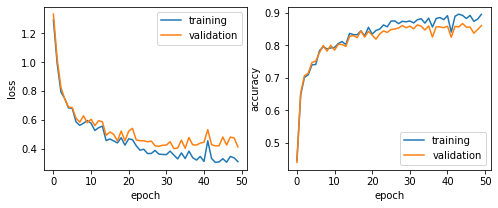

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(training_loss_vs_epoch,label='training')
ax[0].plot(validation_loss_vs_epoch,label='validation')

ax[1].plot(training_acc_vs_epoch,label='training')
ax[1].plot(validation_acc_vs_epoch,label='validation')

y_labels = ['loss', 'accuracy']
for i in range(2):
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel(y_labels[i])
    ax[i].legend()

plt.show()

In [49]:
# Check results.
from evaluate import evaluate_on_dataset

# Test on validation set.
accuracy = evaluate_on_dataset(path_to_validation_data)
print("old validation set: {0:.5f}".format(accuracy))

# Test on a new validation set.
valid_path = 'galaxy_validation/'
accuracy = evaluate_on_dataset(valid_path)
print("new validation set: {0:.5f}".format(accuracy))

old validation set: 0.85980
new validation set: 0.85980
